<a href="https://colab.research.google.com/github/ironcevic/modelling_week11/blob/main/Practical11_solved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
"""
Welcome to Google Colab! (yes single l)
Colab is set up in Python.
In Colab, some lines are code and some are comments.
This whole block is a comment because it is encased in quotes.
Comments can also be marked with #.
You can toggle # on and off using "Ctrl + /".
"""

print("Hello, world!") # this is a line of code
# print("This is commented out") # this will not execute as it starts with #

a = 5
# a = "ice cream"
print(a) # is a 5 or ice cream?

"""
You can also run bash commands by pre-appending lines with "!".
Try it below.
There is also a file explorer on the left.
"""

!ls # this is a bash command
!pwd


Hello, world!
ice cream
cumulene.bands.dat	cumulene.xml	       polyene.relax.out
cumulene.bands.dat.gnu	functions.py	       polyene.save
cumulene.bands.dat.rap	polyene.bands.dat      polyene.scf.in
cumulene.bands.in	polyene.bands.dat.gnu  polyene.scf.out
cumulene.bands.out	polyene.bands.dat.rap  polyene.xml
cumulene.dos		polyene.bands.in       __pycache__
cumulene.dos.in		polyene.bands.out      sample_data
cumulene.dos.out	polyene.dos	       supercell-poly.xyz
cumulene.save		polyene.dos.in	       supercell.xyz
cumulene.scf.in		polyene.dos.out        unitcell-poly.xsf
cumulene.scf.out	polyene.relax.in       unitcell.xsf
/content


In [17]:
"""
Here we will install Quantum Espresso and load the modules we need.
"""

!sudo apt-get update
!sudo apt-get install -y quantum-espresso
!pip install ase
from functions import *


Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 https://cli.github.com/packages stable InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading packag

In [6]:
"""
We can inspect our first input file, cumulene.scf.in, by double-clicking on it.
We can write the geometry to a different file in order to visualise it.
This is done by creating a python object, atoms, and writing it to a file.
After executing the code below, open "unitcell.xsf" using Vesta
and "supercell.xyz" using Avogadro.
"""

atoms = read('cumulene.scf.in', format='espresso-in') # load geometry
write('unitcell.xsf', atoms) # write the atoms object as an xsf
supercell = atoms.repeat((10, 1, 1)) # create supercell object
write('supercell.xyz', supercell) # write supercell object as xyz


In [7]:
"""
Let's run our first Quantum Espresso calculation.
This will take ~1 min 50 s.
What does it generate?
"""

!pw.x < cumulene.scf.in > cumulene.scf.out


In [8]:
"""
Now we shall run a density of states (DOS) post-processing calculation.
Which files does it produce?
"""

!dos.x < cumulene.dos.in > cumulene.dos.out


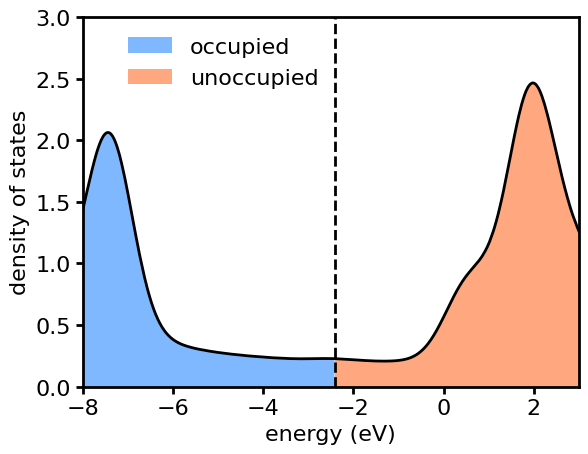

In [9]:
"""
To analyse the results of our DOS calculation, we shall load the results from
cumulene.dos into an object called dos. Then we plot the density of states.
"""

dos = np.genfromtxt("cumulene.dos", skip_header=1) # create the dos object

# print(dos[0]) # what does this print?
# print(dos.T[0]) # how about this?

fermi_level = -2.4177 # find in the scf output
energy_limits = [-8, 3] # where do we plot the energy

# this below prints the DOS
plt.plot(dos[:, 0], dos[:, 1], color = 'k') # plot the dos as a black line
plt.axvline(fermi_level, linestyle='dashed', color = "k") # fermi energy
# the next two lines make a fill with a colour depending on occupancy
plt.fill_between(dos[:, 0], dos[:, 1], where=(dos[:, 0] < fermi_level),
                 facecolor=colours["blue"], alpha=0.5, label='occupied')
plt.fill_between(dos[:, 0], dos[:, 1], where=(dos[:, 0] >= fermi_level),
                 facecolor=colours["orange"], alpha=0.5, label='unoccupied')
plt.xlabel("energy (eV)")
plt.ylabel("density of states")
plt.xlim(energy_limits)
plt.ylim(0, 3)
plt.legend(loc="upper left", frameon=False, bbox_to_anchor=(0.05, 1))
plt.show()

In [10]:
"""
Let us now plot the band structure. First we run a post-processing calculation.
What does it generate?
"""

!bands.x < cumulene.bands.in > cumulene.bands.out


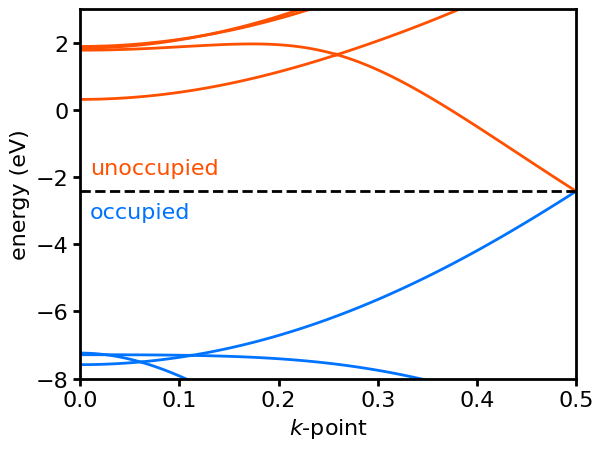

Valence band effective mass is 0.0155.
Conduction band effective mass is 0.0153.


In [25]:
"""
Let us now plot the band structure.
"""

bands = np.genfromtxt("cumulene.bands.dat.gnu") # create the bands object
# print(np.shape(bands)) # what is its shape? compare with the .gnu file
bands = np.split(bands, 9) # split it into 9 bands
# print(np.shape(bands)) # what is its shape now?
# print(bands[0]) # try printing the energies of the first band!

fermi_level = -2.4177 # find in the scf output
energy_limits = [-8, 3] # the energy range to plot

# here below we shall plot the band structure
for band in bands:
    x = band[:, 0]
    y = band[:, 1]
    # can you figure out what the four lines below do?
    if np.all(y < fermi_level):
        plt.plot(x, y, color=colours["blue"])
    else:
        plt.plot(x, y, color=colours["orange"])
plt.ylim(energy_limits)
plt.xlim(0, 0.5)
plt.axhline(y=fermi_level, color='k', linestyle='--')
plt.xlabel(r"$k$-point")
plt.ylabel("energy (eV)")
plt.annotate("occupied", xy=(0.01, fermi_level-0.8), color=colours["blue"])
plt.annotate("unoccupied", xy=(0.01, fermi_level+0.5), color=colours["orange"])
plt.show()

# Determine the effective masses.
mass_vb = effective_mass(bands[4][:, 0], bands[4][:, 1], a=2.46, n_points=5)
mass_cb = effective_mass(bands[5][:, 0], bands[5][:, 1], a=2.46, n_points=5)
print(f"Valence band effective mass is {np.abs(np.round(mass_vb, 4))}.")
print(f"Conduction band effective mass is {np.abs(np.round(mass_cb, 4))}.")


In [12]:
"""
All these results were obtained for a cumulenic geometry.
Let's now relax the geometry and do it all again.
Inspect the input flags in polyene.relax.in.
What do you expect to get?
With a reasonable starting geometry this takes 4-5 min.
"""
!pw.x < polyene.relax.in > polyene.relax.out


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [13]:
"""
Now paste the results into polyene.scf.in and run the code below to
and visualise the optimised geometry.
"""

atoms = read('polyene.scf.in', format='espresso-in') # load geometry into an object called atoms
write('unitcell-poly.xsf', atoms) # write the atoms object as an xsf
supercell = atoms.repeat((10, 1, 1)) # create supercell object
write('supercell-poly.xyz', supercell) # write supercell object as xyz


In [14]:
"""
If you are happy with the geometry, paste it in polyene.scf.in and we can
proceed with the scf calculation. About 2 min.
"""

!pw.x < polyene.scf.in > polyene.scf.out


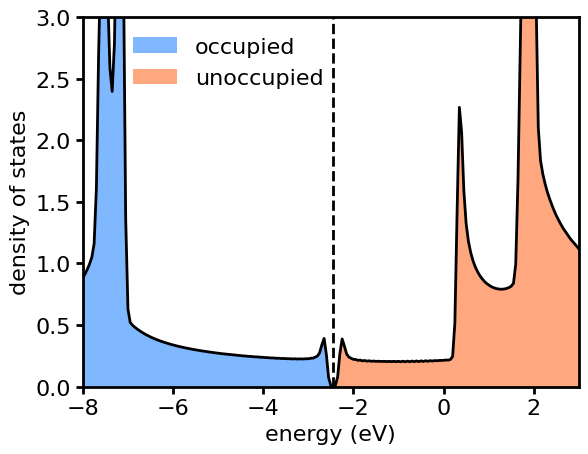

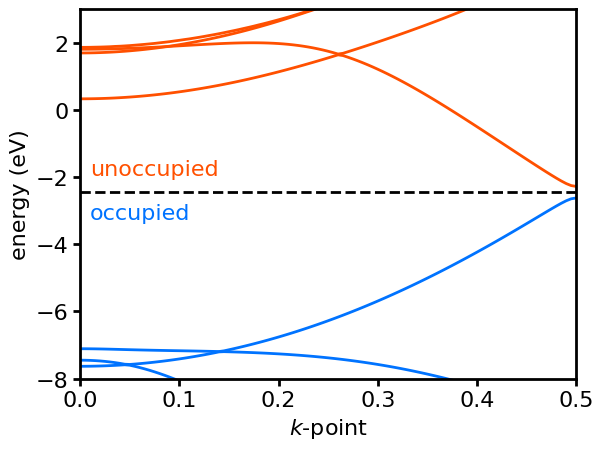

Valence band effective masss is 0.0306.
Conduction band effective masss is 0.03.


In [26]:
"""
Now let's plot the density of states, band structure, and determine the
effective masses.
"""

# !dos.x < polyene.dos.in > polyene.dos.out
# !bands.x < polyene.bands.in > polyene.bands.out

dos = np.genfromtxt("polyene.dos", skip_header=1) # create the dos object
bands = np.genfromtxt("polyene.bands.dat.gnu") # create the bands object
bands = np.split(bands, 9) # split it into 9 bands

fermi_level = -2.4510 # find in the scf output
energy_limits = [-8, 3] # where do we plot the energy

# this below prints the DOS
plt.plot(dos[:, 0], dos[:, 1], color = 'k') # plot the dos as a black line
plt.axvline(fermi_level, linestyle='dashed', color = "k") # fermi energy
# the next two lines make a fill with a colour depending on occupancy
plt.fill_between(dos[:, 0], dos[:, 1], where=(dos[:, 0] < fermi_level),
                 facecolor=colours["blue"], alpha=0.5, label='occupied')
plt.fill_between(dos[:, 0], dos[:, 1], where=(dos[:, 0] >= fermi_level),
                 facecolor=colours["orange"], alpha=0.5, label='unoccupied')
plt.xlabel("energy (eV)")
plt.ylabel("density of states")
plt.xlim(energy_limits)
plt.ylim(0, 3)
plt.legend(loc="upper left", frameon=False, bbox_to_anchor=(0.06, 1))
plt.show()

# here below we shall plot the band structure
for band in bands:
    x = band[:, 0]
    y = band[:, 1]
    # can you figure out what the four lines below do?
    if np.all(y < fermi_level):
        plt.plot(x, y, color=colours["blue"])
    else:
        plt.plot(x, y, color=colours["orange"])
plt.ylim(energy_limits)
plt.xlim(0, 0.5)
plt.axhline(y=fermi_level, color='k', linestyle='--')
plt.xlabel(r"$k$-point")
plt.ylabel("energy (eV)")
plt.annotate("occupied", xy=(0.01, fermi_level-0.8), color=colours["blue"])
plt.annotate("unoccupied", xy=(0.01, fermi_level+0.5), color=colours["orange"])
plt.show()

# Determine the effective masses.
mass_vb = effective_mass(bands[4][:, 0], bands[4][:, 1], a=2.46, n_points=5)
mass_cb = effective_mass(bands[5][:, 0], bands[5][:, 1], a=2.46, n_points=5)
print(f"Valence band effective masss is {np.abs(np.round(mass_vb, 4))}.")
print(f"Conduction band effective masss is {np.abs(np.round(mass_cb, 4))}.")
